In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import json

In [2]:
pwd()

'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\post analysis'

In [6]:
parent_dir = 'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\'
working_folder = 'Three Stage RO' 

I=10
k=5

In [1]:
results_folder = 'results'
file_name = "results_decomposition_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    result_decomposition = json.load(file)

file_name = "results_embed_NN_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    result_embed_NN = json.load(file)

file_name = "results_exact_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    result_exact= json.load(file)

file_name = "times_decomposition_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    time_decomposition = json.load(file)

file_name = "times_embed_NN_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    time_embed_NN = json.load(file)

file_name = "times_exact_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    time_exact = json.load(file)

NameError: name 'I' is not defined

In [ ]:
## improved NN results
results_folder = "results improved NN"
file_name = "results_decomposition_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    result_decomposition_improved_NN = json.load(file)
    
file_name = "times_decomposition_"+str(I)+"_"+str(k)+".json"
file_path = os.path.join(parent_dir, working_folder, results_folder, file_name)
with open(file_path, 'r') as file:
    time_decomposition_improved_NN = json.load(file)
    

In [13]:
#index = 64

In [14]:
#result_decomposition[str(index)]

In [15]:
#result_decomposition[str(index)][-1]["objective_value"]

In [16]:
#result_embed_NN[str(index)]#["objective_value"]

In [17]:
obj_value_diff = np.zeros(250)
obj_decompose =np.zeros(250)
obj_embed_NN = np.zeros(250)
for i in range(1, 251):
    obj_decompose[i-1] = result_decomposition[str(i)][-1]["objective_value"]
    obj_embed_NN[i-1] = result_embed_NN[str(i)]["objective_value"]
    obj_value_diff[i-1] = (result_decomposition[str(i)][-1]["objective_value"]-result_embed_NN[str(i)]["objective_value"])
obj_value_diff = np.array([x if abs(x) >= 1e-6 else 0 for x in obj_value_diff])


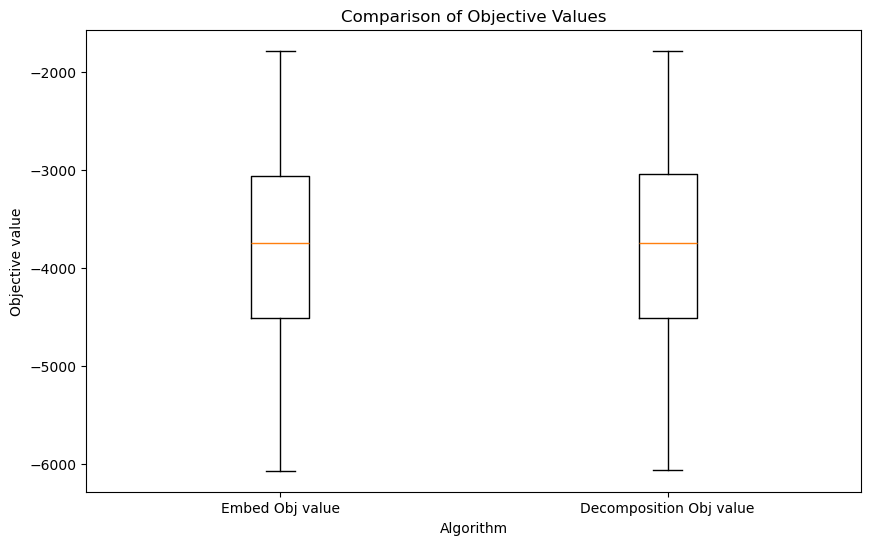

In [18]:
# Combine data into a list of lists for the box plot
data = [obj_embed_NN, obj_decompose]

# Plotting
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(data, labels=['Embed Obj value','Decomposition Obj value'])

# Adding titles and labels
plt.title('Comparison of Objective Values')
plt.xlabel('Algorithm')
plt.ylabel('Objective value')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Objective value comparison: Embedded obj value vs Decompostion obj value')

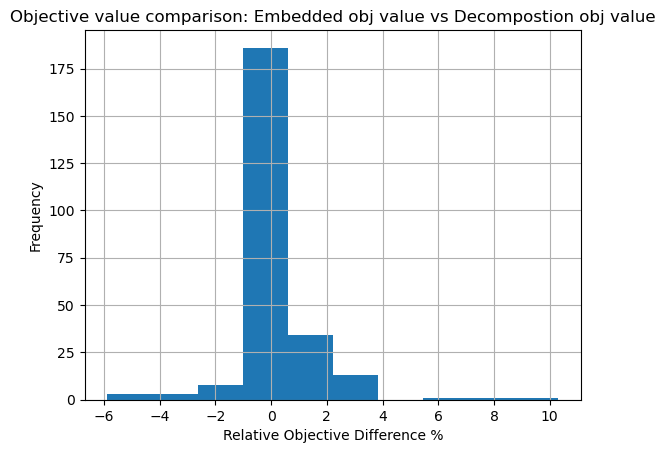

In [19]:
plt.hist((obj_embed_NN - obj_decompose)*100/obj_decompose, bins=10)
plt.grid()
plt.xlabel("Relative Objective Difference %")
plt.ylabel("Frequency")
plt.title("Objective value comparison: Embedded obj value vs Decompostion obj value")

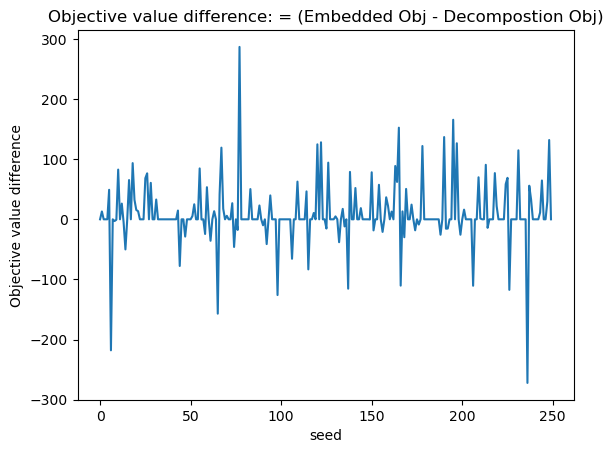

In [20]:
plt.plot(obj_value_diff)
plt.ylabel("Objective value difference")
plt.xlabel("seed")
plt.title("Objective value difference: = (Embedded Obj - Decompostion Obj)")
plt.show()

In [21]:
np.where(obj_value_diff < -600)

(array([], dtype=int64),)

In [22]:
(len(np.where(obj_value_diff != 0)[0])-250)/250

-0.576

In [23]:
len(np.where(obj_value_diff != 0)[0])

106

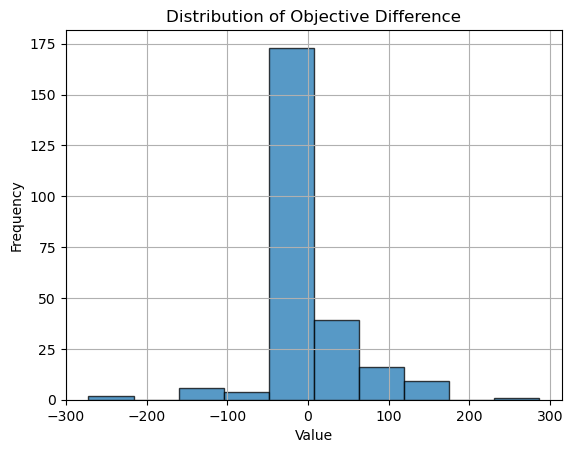

In [24]:
plt.hist(obj_value_diff, bins=10, alpha=0.75, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Objective Difference')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.savefig("objdiff.png")
# Show plot
plt.show()


## Time

In [25]:
sorted_keys = sorted(time_embed_NN.keys(), key=int)

# Retrieve the sorted values
sorted_time_embed_NN = np.array([time_embed_NN[key]['value'] for key in sorted_keys])/1000
sorted_time_decomposition = np.array([time_decomposition[key]['value'] for key in sorted_keys])/1000 # divide by 1000 for ms to s


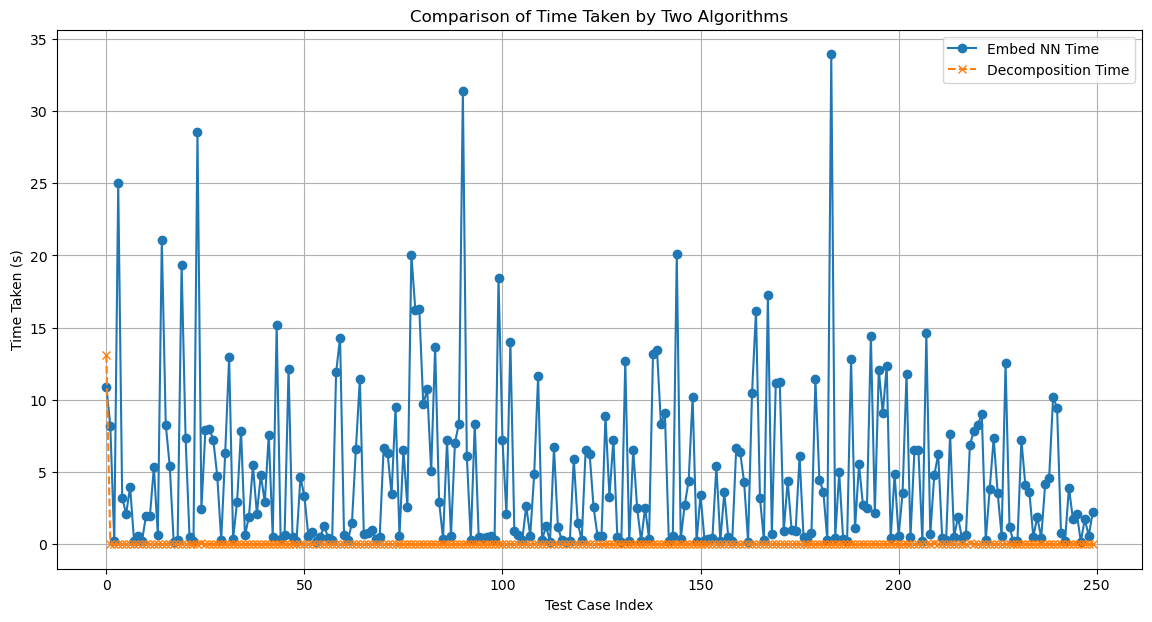

In [26]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot the data
plt.plot(sorted_time_embed_NN, label='Embed NN Time', marker='o', linestyle='-')
plt.plot(sorted_time_decomposition, label='Decomposition Time', marker='x', linestyle='--')

# Adding titles and labels
plt.title('Comparison of Time Taken by Two Algorithms')
plt.xlabel('Test Case Index')
plt.ylabel('Time Taken (s)')

# Adding a legend
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()

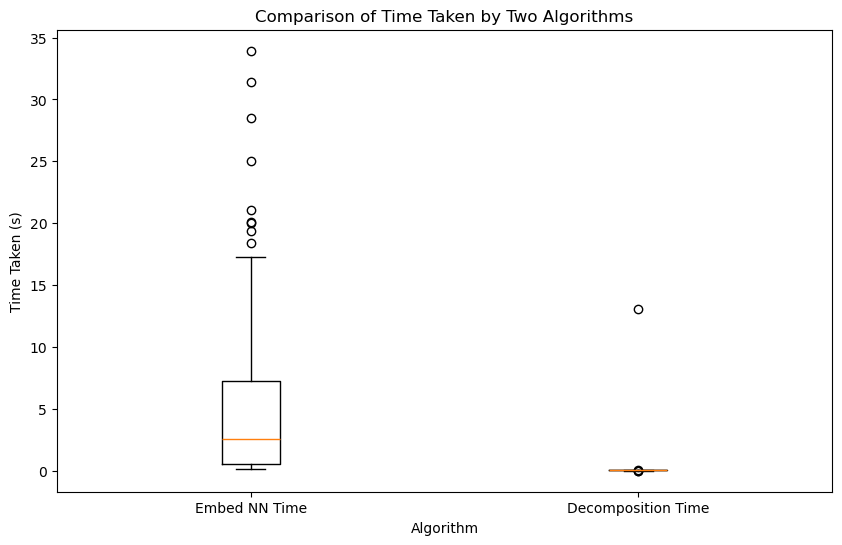

In [27]:
# Combine data into a list of lists for the box plot
data = [sorted_time_embed_NN, sorted_time_decomposition]

# Plotting
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(data, labels=['Embed NN Time', 'Decomposition Time'])

# Adding titles and labels
plt.title('Comparison of Time Taken by Two Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Time Taken (s)')

# Show the plot
plt.show()

In [28]:
sum(sorted_time_embed_NN)/len(sorted_time_embed_NN)

4.830515999999996

In [29]:
sum(sorted_time_decomposition)/len(sorted_time_decomposition)

0.07989599999999991

In [30]:
time_decom_arr = np.array(sorted_time_decomposition)
time_embed_arr = np.array(sorted_time_embed_NN)

In [31]:
sum(time_embed_arr>=600)

0

In [32]:
np.mean(time_embed_arr)

4.830515999999999

## Exact Results

In [43]:
obj_exact = np.zeros(250)
for i in range(1,251):
    obj_exact[i-1] = result_exact[str(i)]["objective_value"]

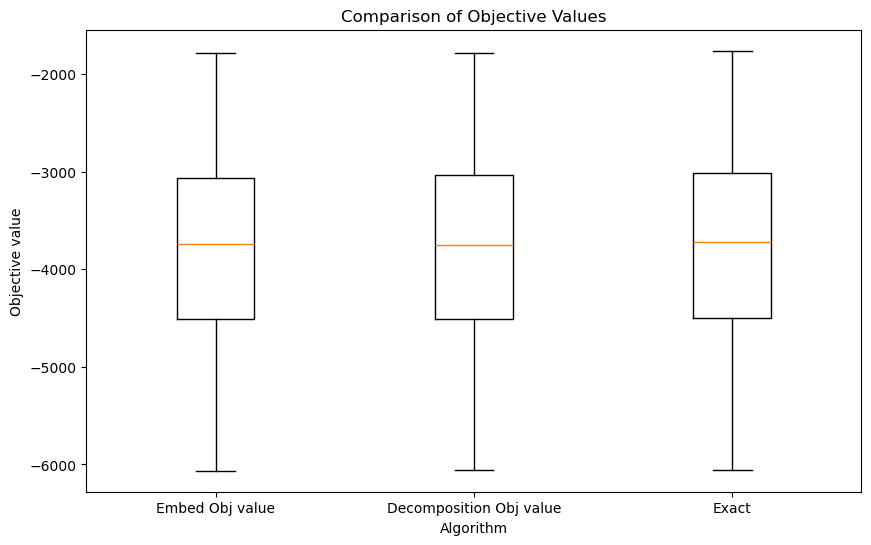

In [44]:
# Combine data into a list of lists for the box plot
data = [obj_embed_NN, obj_decompose, obj_exact]

# Plotting
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(data, labels=['Embed Obj value','Decomposition Obj value', 'Exact'])

# Adding titles and labels
plt.title('Comparison of Objective Values')
plt.xlabel('Algorithm')
plt.ylabel('Objective value')

# Show the plot
plt.show()

In [45]:
obj_value_df = pd.DataFrame({"NN_Embed":obj_embed_NN, "Decompose":obj_decompose, "Exact":obj_exact})

<Axes: >

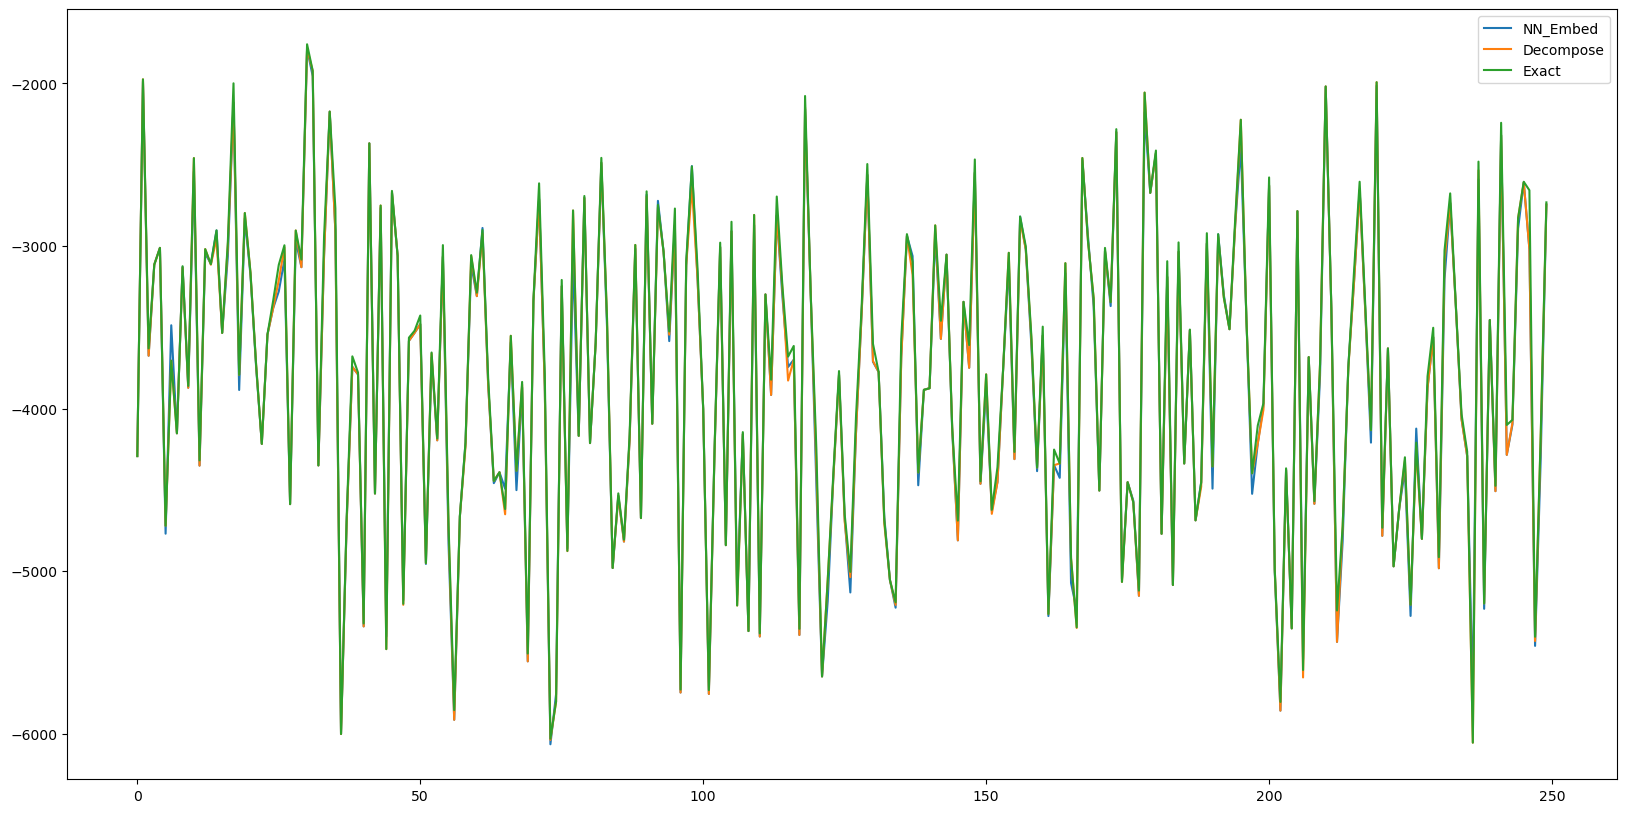

In [46]:
obj_value_df.plot(figsize=(20,10))

<Axes: >

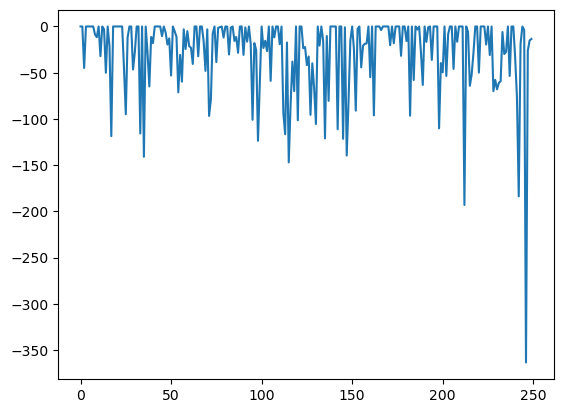

In [47]:
(obj_value_df["Decompose"]-obj_value_df["Exact"]).plot()

<Axes: >

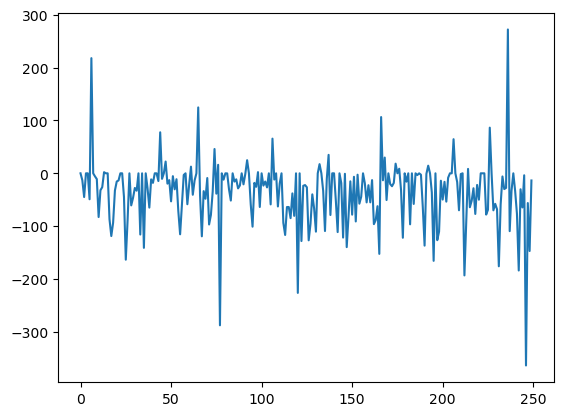

In [48]:
(obj_value_df["NN_Embed"]-obj_value_df["Exact"]).plot()

### Comparison of embed and Decompose against exact

In [49]:
pwd()

'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\post analysis'

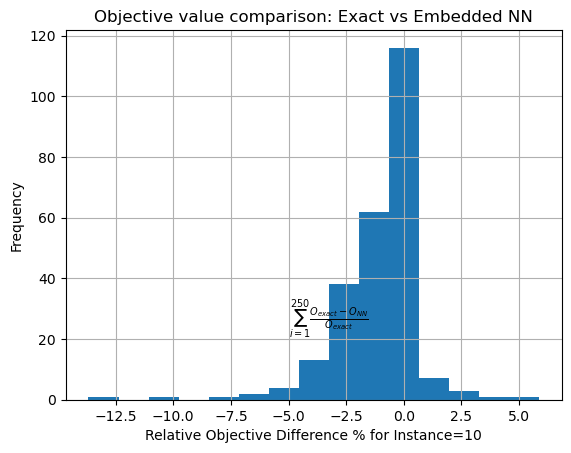

In [50]:
relative_difference = (np.array(obj_exact) - np.array(obj_embed_NN)) * 100 / np.array(obj_exact)

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

# Define the figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(relative_difference, bins=15)

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel("Relative Objective Difference % for Instance="+str(I))
ax.set_ylabel("Frequency")
ax.set_title("Objective value comparison: Exact vs Embedded NN")
ax.text(-5,25,"$\\sum_{i=1}^{250}\\frac{O_{exact}-O_{NN}}{O_{exact}}$")

plt.savefig(".\objective value plots\Obj exact vs NN I" + str(I)+".png")
# Show the plot
plt.show()

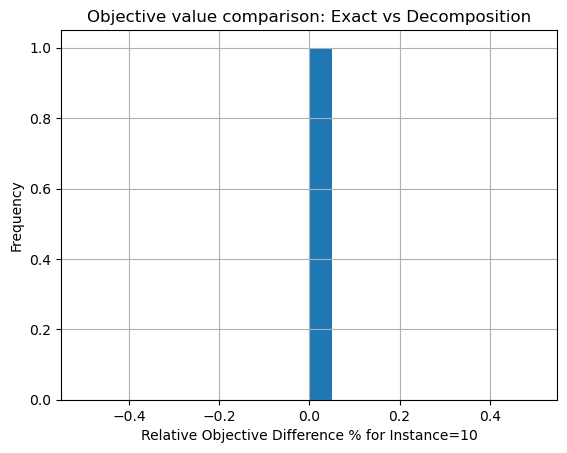

In [55]:
relative_difference = (np.array(obj_exact) - np.array(obj_decompose)) * 100 / np.array(obj_exact)

# Define the figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(relative_difference[1], bins=20)

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel("Relative Objective Difference % for Instance="+str(I))
ax.set_ylabel("Frequency")
ax.set_title("Objective value comparison: Exact vs Decomposition")
#ax.text(-5,25,"$\\sum_{i=1}^{250}\\frac{O_{exact}-O_{decompose}}{O_{exact}}$")

plt.savefig(".\objective value plots\Obj exact vs decompose I" + str(I)+".png")
# Show the plot
plt.show()

In [52]:
postdata_rest_NN = pd.read_csv('C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\post train NN data\\10 instance 50 scenarios\\post_NN_results_10_instance_50_scen.csv')

In [53]:
postdata_impr_NN = pd.read_csv('C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\ROoptjulia\\post train NN data\\10 instance 50 scenarios improved\\post_NN_results_10_instance_50_scen.csv')

In [54]:
postdata_rest_NN[[col for col in postdata_rest_NN.columns if col.startswith('Input_Uncer')]]

,Input_Uncern_0,Input_Uncern_1,Input_Uncern_2,Input_Uncern_3,Input_Uncern_4,Input_Uncern_5,Input_Uncern_6,Input_Uncern_7,Input_Uncern_8,Input_Uncern_9
0,0.047642,0.081654,0.021928,0.142749,0.009451,0.012756,0.024854,0.160938,0.113955,0.236608
1,0.035833,0.077675,0.013902,0.077059,0.482070,0.081857,0.223603,0.084106,0.107787,0.091752
2,0.002750,0.002681,0.142315,0.042530,0.045663,0.270992,0.017753,0.044372,0.063685,0.200556
3,0.178517,0.027506,0.009746,0.090197,0.029235,0.131779,0.254967,0.008001,0.025520,0.063763
4,0.046348,0.028977,0.185955,0.065016,0.074192,0.679728,0.036351,0.187670,0.002005,0.371455
...,...,...,...,...,...,...,...,...,...,...
109995,0.135808,0.025949,0.011322,0.592050,0.153153,0.490043,0.004311,0.191671,0.008481,0.090083
109996,0.144868,0.036762,0.230312,0.096598,0.048843,0.200606,0.165694,0.088107,0.125520,0.064875
109997,0.195341,0.063489,0.101612,0.042783,0.163045,0.048454,0.081326,0.305783,0.130224,0.130399
109998,0.104020,0.108555,0.048943,0.112094,0.308868,0.233459,0.041677,0.021186,0.248111,0.022984


In [42]:
postdata_impr_NN[[col for col in postdata_impr_NN.columns if col.startswith('Input_Uncer')]]

,Input_Uncern_0,Input_Uncern_1,Input_Uncern_2,Input_Uncern_3,Input_Uncern_4,Input_Uncern_5,Input_Uncern_6,Input_Uncern_7,Input_Uncern_8,Input_Uncern_9
0,0.047642,0.081654,0.021928,0.142749,0.009451,0.012756,0.024854,0.160938,0.113955,0.236608
1,0.035833,0.077675,0.013902,0.077059,0.482070,0.081857,0.223603,0.084106,0.107787,0.091752
2,0.002750,0.002681,0.142315,0.042530,0.045663,0.270992,0.017753,0.044372,0.063685,0.200556
3,0.178517,0.027506,0.009746,0.090197,0.029235,0.131779,0.254967,0.008001,0.025520,0.063763
4,0.046348,0.028977,0.185955,0.065016,0.074192,0.679728,0.036351,0.187670,0.002005,0.371455
...,...,...,...,...,...,...,...,...,...,...
109995,0.135808,0.025949,0.011322,0.592050,0.153153,0.490043,0.004311,0.191671,0.008481,0.090083
109996,0.144868,0.036762,0.230312,0.096598,0.048843,0.200606,0.165694,0.088107,0.125520,0.064875
109997,0.195341,0.063489,0.101612,0.042783,0.163045,0.048454,0.081326,0.305783,0.130224,0.130399
109998,0.104020,0.108555,0.048943,0.112094,0.308868,0.233459,0.041677,0.021186,0.248111,0.022984
